Klasifikasi Sampah

1. Nathanael Jeshua Paat
2. Aida Nurrohmah
3. Isni Agustina Arifin

Import Library

In [1]:
!pip install keras -tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 84.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.

In [2]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


In [3]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers


#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.7 MB/s eta 0:00:00


Download dan Unzip Dataset

In [5]:
# https://drive.google.com/file/d/150855rVh-srkGhdywBsPK4_mHSZCwRWg/view?usp=sharing
!gdown 150855rVh-srkGhdywBsPK4_mHSZCwRWg

Downloading...
From: https://drive.google.com/uc?id=150855rVh-srkGhdywBsPK4_mHSZCwRWg
To: /content/Dataset.zip
100% 40.9M/40.9M [00:01<00:00, 33.4MB/s]


In [6]:
%%capture
!unzip Dataset.zip;

In [7]:
BATCH_SIZE = 64
EPOCHS = 50
IM_HEIGHT = 300
IM_WIDTH = 300

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
for dirname, _, filenames in os.walk('/content/Garbage classification'):
    print(dirname)

/content/Garbage classification
/content/Garbage classification/cardboard
/content/Garbage classification/paper
/content/Garbage classification/metal
/content/Garbage classification/glass
/content/Garbage classification/plastic


In [10]:
filenames = tf.io.gfile.glob('/content/Garbage classification/*/*')
print(len(filenames))
filenames[:3]

2390


['/content/Garbage classification/paper/paper398.jpg',
 '/content/Garbage classification/paper/paper229.jpg',
 '/content/Garbage classification/paper/paper442.jpg']

In [11]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

paper        594
glass        501
plastic      482
metal        410
cardboard    403
Name: class, dtype: int64


,filename,class
0,/content/Garbage classification/paper/paper398...,paper
1,/content/Garbage classification/paper/paper229...,paper
2,/content/Garbage classification/paper/paper442...,paper
3,/content/Garbage classification/paper/paper207...,paper
4,/content/Garbage classification/paper/paper577...,paper
...,...,...
2385,/content/Garbage classification/plastic/plasti...,plastic
2386,/content/Garbage classification/plastic/plasti...,plastic
2387,/content/Garbage classification/plastic/plasti...,plastic
2388,/content/Garbage classification/plastic/plasti...,plastic


Mengacak Data

In [12]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/Garbage classification/glass/glass233...,glass
1,/content/Garbage classification/glass/glass158...,glass
2,/content/Garbage classification/paper/paper576...,paper
3,/content/Garbage classification/paper/paper126...,paper
4,/content/Garbage classification/paper/paper194...,paper
...,...,...
2385,/content/Garbage classification/metal/metal315...,metal
2386,/content/Garbage classification/glass/glass387...,glass
2387,/content/Garbage classification/glass/glass373...,glass
2388,/content/Garbage classification/glass/glass76.jpg,glass


In [13]:
change = {
'cardboard' : '0',
'glass': '1',
'metal' : '2',
'paper' : '3',
'plastic' : '4'
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/Garbage classification/glass/glass233...,1
1,/content/Garbage classification/glass/glass158...,1
2,/content/Garbage classification/paper/paper576...,3
3,/content/Garbage classification/paper/paper126...,3
4,/content/Garbage classification/paper/paper194...,3
...,...,...
2385,/content/Garbage classification/metal/metal315...,2
2386,/content/Garbage classification/glass/glass387...,1
2387,/content/Garbage classification/glass/glass373...,1
2388,/content/Garbage classification/glass/glass76.jpg,1


In [14]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(2390, 2)
(2390, 2)


In [15]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)


Membagi Dataset

In [16]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['class'])
print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))

3    475
1    401
4    386
2    328
0    322
Name: class, dtype: int64
3    119
1    100
4     96
2     82
0     81
Name: class, dtype: int64


Augmentasi Data

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=True,
                  num_parallel_calls=AUTOTUNE)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
                 test_data,
                 x_col="filename",
                 y_col="class",
                 target_size=(IM_HEIGHT, IM_WIDTH),
                 class_mode='categorical',
                 batch_size= BATCH_SIZE,
                 color_mode='rgb',
                 shuffle=False,
                 num_parallel_calls=AUTOTUNE)

Found 1912 validated image filenames belonging to 5 classes.
Found 478 validated image filenames belonging to 5 classes.


Arsitektur Model

In [18]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IM_HEIGHT, IM_WIDTH, 3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [19]:
init_time = datetime.datetime.now()


train_steps = train_generator.samples // BATCH_SIZE
valid_steps = test_generator.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = model.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/50
29/29 [==============================] - 66s 2s/step - loss: 2.5874 - accuracy: 0.3295 - val_loss: 1.3746 - val_accuracy: 0.3884 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 50s 2s/step - loss: 1.3619 - accuracy: 0.3961 - val_loss: 1.3548 - val_accuracy: 0.3549 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 49s 2s/step - loss: 1.3163 - accuracy: 0.4280 - val_loss: 1.2615 - val_accuracy: 0.4554 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 49s 2s/step - loss: 1.2729 - accuracy: 0.4502 - val_loss: 1.2282 - val_accuracy: 0.4487 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 49s 2s/step - loss: 1.2120 - accuracy: 0.5097 - val_loss: 1.1155 - val_accuracy: 0.5201 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 49s 2s/step - loss: 1.1386 - accuracy: 0.5216 - val_loss: 1.0853 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 47s 2s/step - loss: 1.1259 - a

In [20]:
def plot_performance(model_name, accuracy, val_accuracy, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

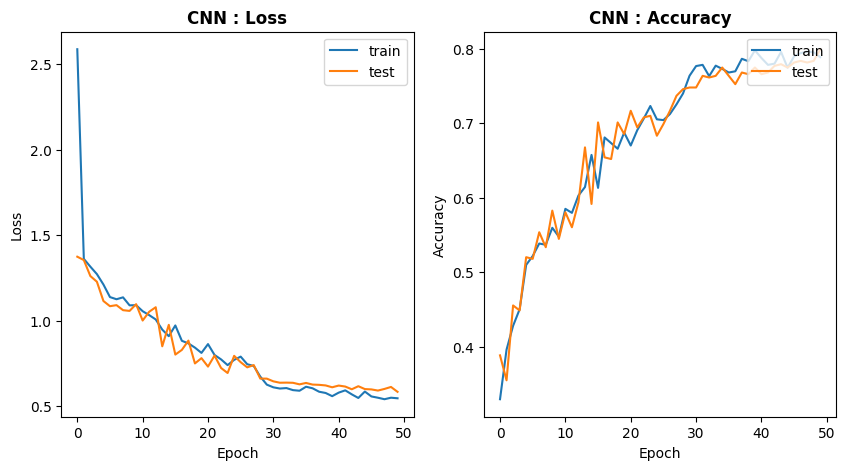

In [21]:
plot_performance(model_name='CNN',
                  accuracy=history.history['accuracy'],
                 val_accuracy=history.history['val_accuracy'],
                 loss=history.history['loss'],
                 val_loss=history.history['val_loss'])

In [22]:
test_steps = test_generator.samples // BATCH_SIZE

test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

7/7 [==============================] - 2s 221ms/step - loss: 0.5846 - accuracy: 0.7991

accuracy: 0.7991071343421936 loss:  0.58461993932724


In [23]:
predict = model.predict(test_generator, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

7/7 [==============================] - 2s 221ms/step


array([2, 4, 4, 0, 3, 1, 2, 3, 4, 4, 3, 4, 2, 1, 4, 0, 3, 4, 3, 4])

In [24]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
'4' : 4
}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([2, 3, 4, 0, 0, 1, 4, 3, 1, 3, 3, 4, 2, 1, 2, 0, 3, 4, 3, 3])

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        76
           1       0.80      0.72      0.76        95
           2       0.73      0.76      0.75        79
           3       0.88      0.92      0.90       110
           4       0.66      0.70      0.68        88

    accuracy                           0.80       448
   macro avg       0.80      0.80      0.80       448
weighted avg       0.80      0.80      0.80       448
 



<Axes: >

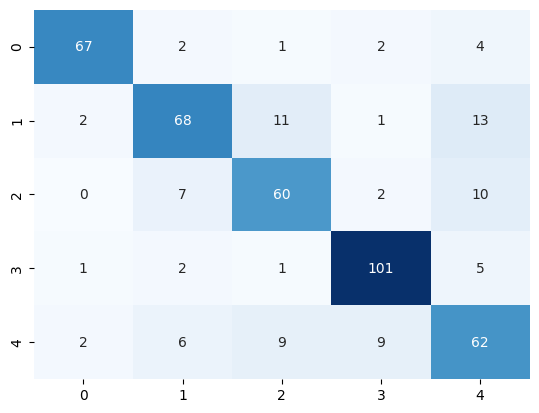

In [25]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)